In [2]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [3]:
ls

MyDrive/  Shareddrives/


In [4]:
cd /gdrive/MyDrive/phishing

/gdrive/MyDrive/phishing


In [5]:
ls

Phishing_Legitimate_full.csv


# Importing Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier as rf
import warnings
warnings.filterwarnings("ignore")

# Uploading Dataset

In [8]:
df=pd.read_csv('Phishing_Legitimate_full.csv')
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [10]:
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# EDA

In [12]:
df.isna().sum().sum()

0

In [14]:
df.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [15]:
df.CLASS_LABEL.value_counts()

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64

In [23]:
columns = df.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [17]:
binary_cols

['AtSymbol',
 'TildeSymbol',
 'NumHash',
 'NoHttps',
 'RandomString',
 'IpAddress',
 'DomainInSubdomains',
 'DomainInPaths',
 'DoubleSlashInPath',
 'EmbeddedBrandName',
 'ExtFavicon',
 'InsecureForms',
 'RelativeFormAction',
 'ExtFormAction',
 'AbnormalFormAction',
 'FrequentDomainNameMismatch',
 'FakeLinkInStatusBar',
 'RightClickDisabled',
 'PopUpWindow',
 'SubmitInfoToEmail',
 'IframeOrFrame',
 'MissingTitle',
 'ImagesOnlyInForm',
 'CLASS_LABEL']

In [24]:
remain_cols

['id',
 'NumDots',
 'SubdomainLevel',
 'PathLevel',
 'UrlLength',
 'NumDash',
 'NumDashInHostname',
 'NumUnderscore',
 'NumPercent',
 'NumQueryComponents',
 'NumAmpersand',
 'NumNumericChars',
 'HttpsInHostname',
 'HostnameLength',
 'PathLength',
 'QueryLength',
 'NumSensitiveWords',
 'PctExtHyperlinks',
 'PctExtResourceUrls',
 'PctNullSelfRedirectHyperlinks',
 'SubdomainLevelRT',
 'UrlLengthRT',
 'PctExtResourceUrlsRT',
 'AbnormalExtFormActionR',
 'ExtMetaScriptLinkRT',
 'PctExtNullSelfRedirectHyperlinksRT']

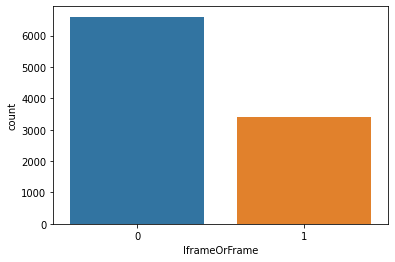

In [20]:
sns.countplot("IframeOrFrame", data=df)

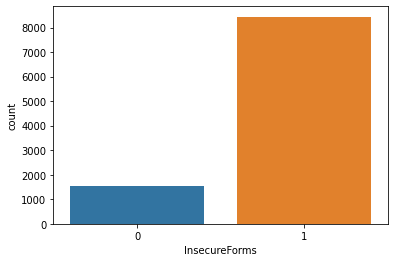

In [21]:
sns.countplot("InsecureForms", data=df)

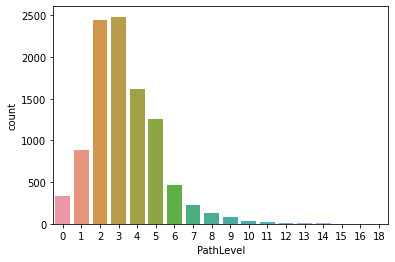

In [26]:
sns.countplot("PathLevel", data=df)

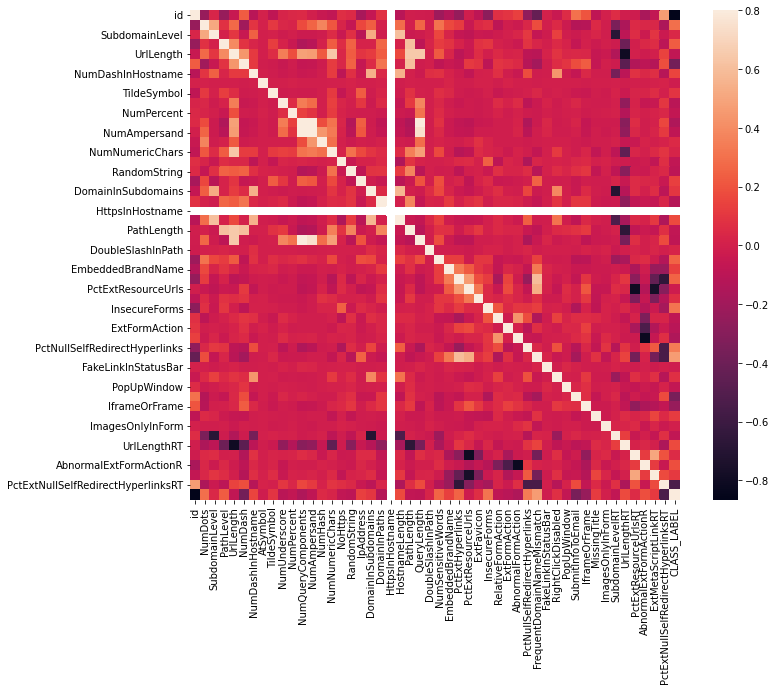

In [27]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

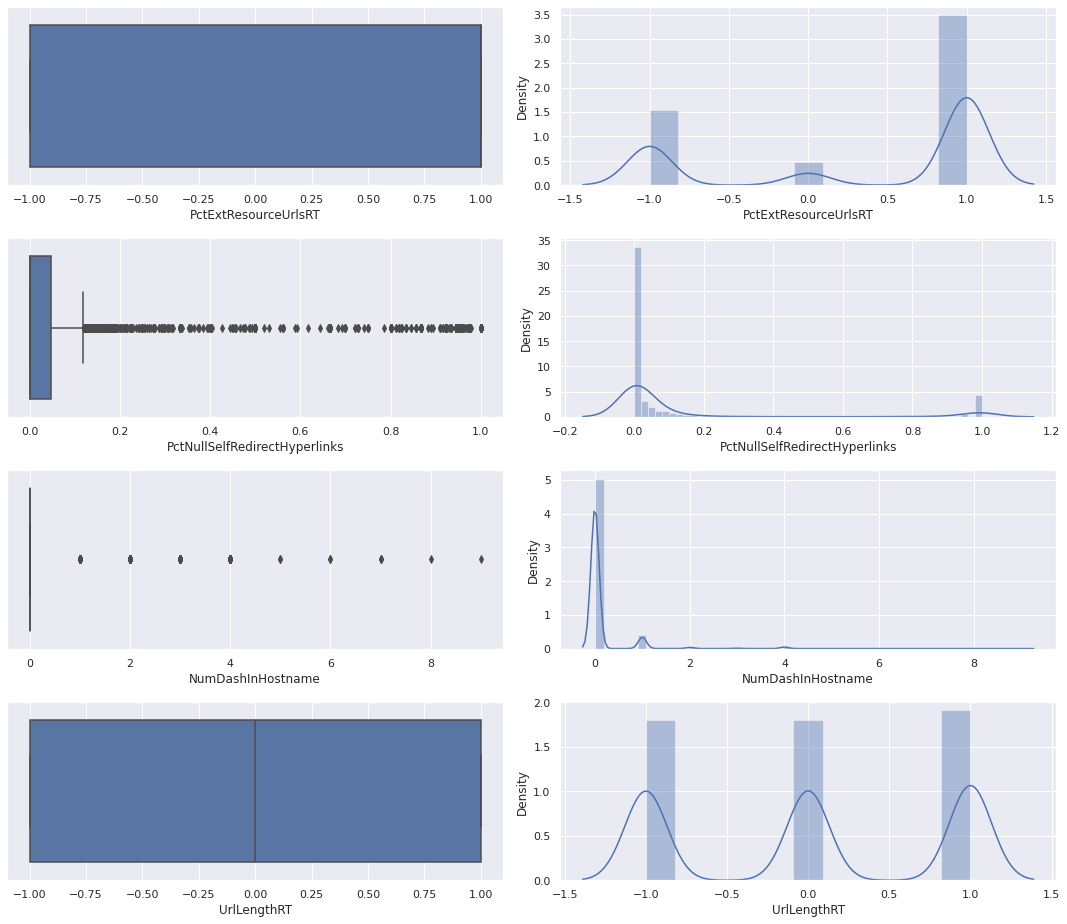

In [31]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= df["PctExtResourceUrlsRT"], ax = ax[0,0])
sns.distplot(df['PctExtResourceUrlsRT'], ax = ax[0,1])
sns.boxplot(x= df["PctNullSelfRedirectHyperlinks"], ax = ax[1,0])
sns.distplot(df['PctNullSelfRedirectHyperlinks'], ax = ax[1,1])
sns.boxplot(x= df["NumDashInHostname"], ax = ax[2,0])
sns.distplot(df['NumDashInHostname'], ax = ax[2,1])
sns.boxplot(x= df["UrlLengthRT"], ax = ax[3,0])
sns.distplot(df['UrlLengthRT'], ax = ax[3,1])
plt.tight_layout()

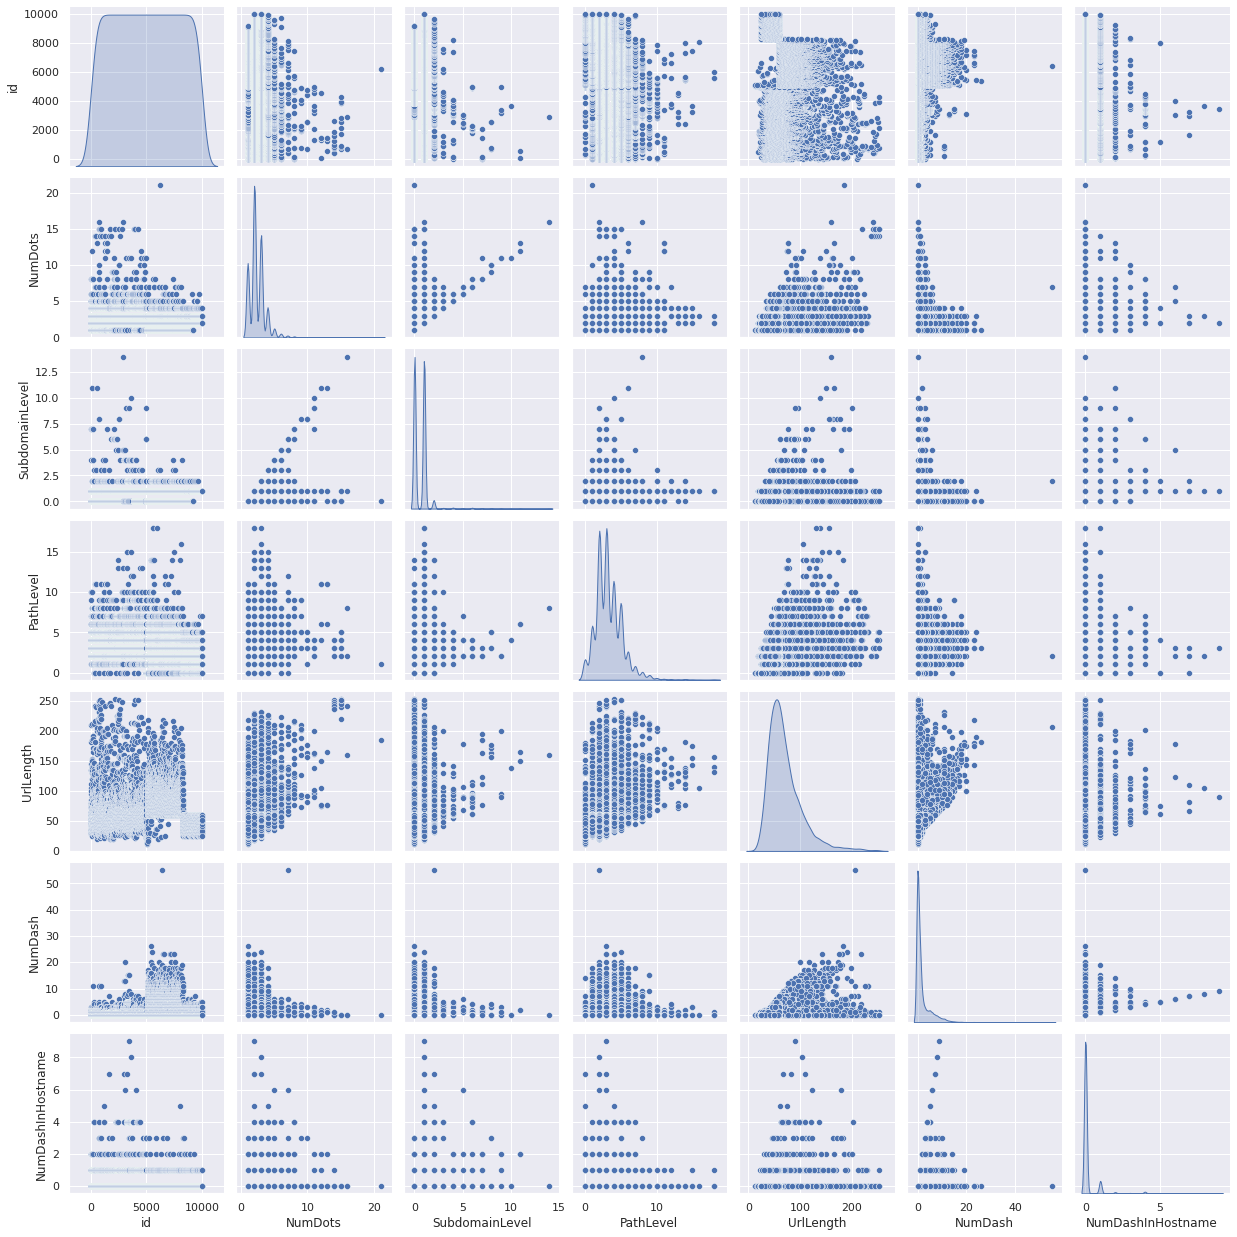

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [32]:
X = df.drop(['CLASS_LABEL'], axis = 1)
Y = df["CLASS_LABEL"]
x_Data = X.values
y_Data = Y.values

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [36]:
model.score(X_test,y_test)

0.9275

In [37]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.91875  0.924375 0.933125 0.92625  0.925625]


In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [39]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.926

In [40]:
confusion_matrix(y_train, pred)

array([[3847,  165],
       [ 427, 3561]])

In [41]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [42]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [43]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       988
           1       0.97      0.89      0.93      1012

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [44]:
cma = confusion_matrix(y_test, predicted_test)

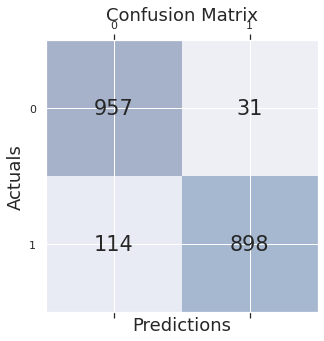

In [45]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [46]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [47]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

1.0

In [48]:
confusion_matrix(y_train, pred)

array([[4012,    0],
       [   0, 3988]])

In [49]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [50]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [51]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00      1012

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [52]:
cma = confusion_matrix(y_test, pred_test)

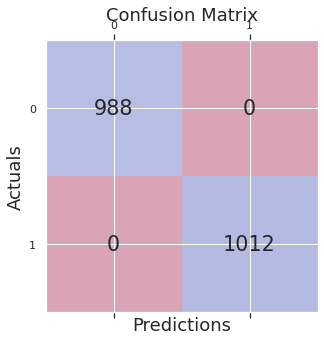

In [53]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [54]:
from sklearn import tree

In [55]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [56]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [57]:
confusion_matrix(y_train, pred1)

array([[4012,    0],
       [   0, 3988]])

In [58]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [59]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00      1012

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [60]:
cma = confusion_matrix(y_test, pred1_test)

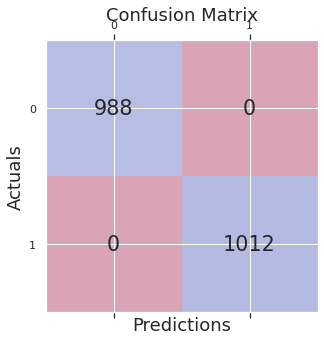

In [61]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression  
clf= LogisticRegression(random_state=0)  
clf.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [63]:
pred_LR= clf.predict(X_train)
accuracy_score(y_train, pred_LR)

0.973

In [64]:
confusion_matrix(y_train, pred_LR)

array([[3902,  110],
       [ 106, 3882]])

In [65]:
pred_LR_test = clf.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [66]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       988
           1       0.98      0.97      0.97      1012

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [67]:
cma = confusion_matrix(y_test, pred_LR_test)

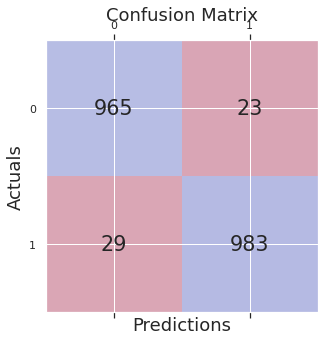

In [68]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Support Vector Machine

In [69]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [70]:
pred_SVM= classifier.predict(X_train)
accuracy_score(y_train, pred_SVM)

1.0

In [71]:
confusion_matrix(y_train, pred_SVM)

array([[4012,    0],
       [   0, 3988]])

In [72]:
pred_SVM_test = classifier.predict(X_test)
t=accuracy_score(y_test, pred_SVM_test)

In [73]:
print(classification_report(y_test, pred_SVM_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00      1012

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [74]:
cma = confusion_matrix(y_test, pred_SVM_test)

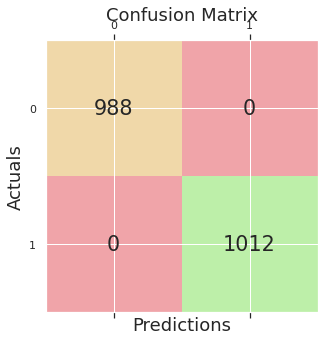

In [75]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [76]:
from sklearn.neural_network import MLPClassifier

In [77]:
clf= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [78]:
pred_NN= clf.predict(X_train)
accuracy_score(y_train, pred_NN)

0.89875

In [90]:
confusion_matrix(y_train, pred_NN)

array([[3740,  272],
       [ 538, 3450]])

In [80]:
pred_NN_test = clf.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [81]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       988
           1       0.94      0.86      0.90      1012

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



In [82]:
cma = confusion_matrix(y_test, pred_NN_test)

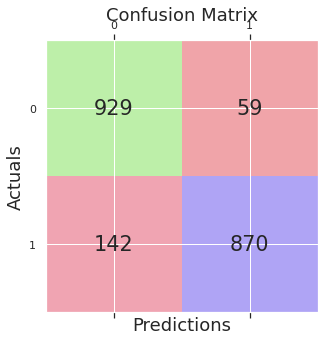

In [83]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [87]:
import xgboost as xgb

In [88]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [89]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

1.0

In [91]:
confusion_matrix(y_train, pred_XGB)

array([[4012,    0],
       [   0, 3988]])

In [94]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [93]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00      1012

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [95]:
cma = confusion_matrix(y_test, pred_XGB_test)

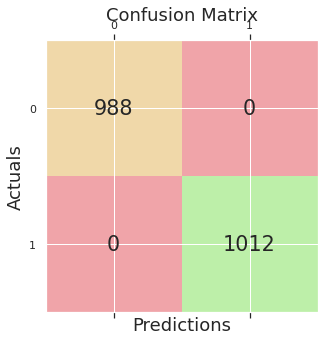

In [96]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

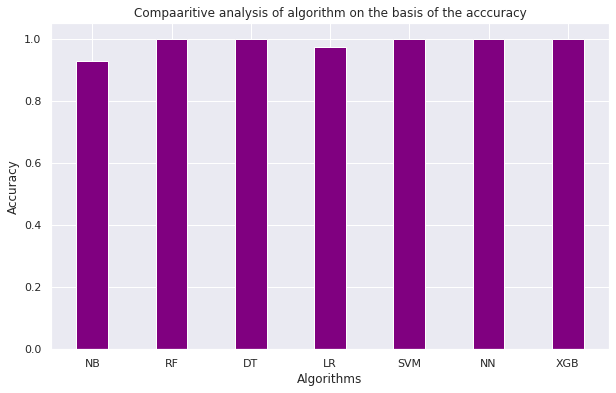

In [97]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'SVM':t,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='purple',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Compaaritive analysis of algorithm on the basis of the acccuracy")
plt.show()


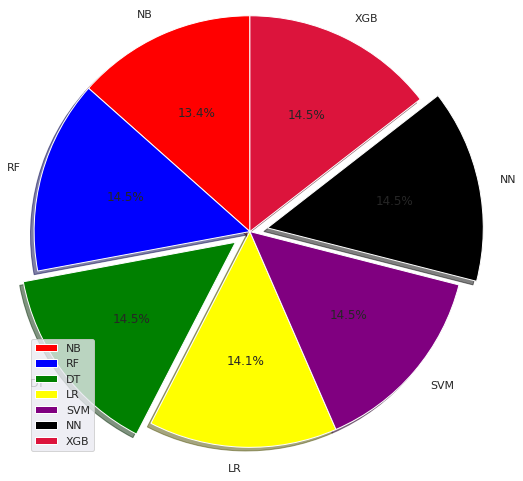

In [98]:
activities = ['NB', 'RF', 'DT', 'LR','SVM','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,t,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','purple','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()